In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read the csv
df = pd.read_csv("./metadata.csv")


In [3]:
df.shape[0]


1000

In [4]:
df

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,4429oz9s,NaN,Medline,Will pay for performance improve quality of ca...,10.1056/nejme1212133,NaN,23134388.0,unk,NaN,2012,"Epstein, Arnold M",The New England journal of medicine,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1056/nejme1212133; https://...,10014458.0
1,sjdy79ok,NaN,Medline; WHO,Impact of Sitagliptin in Non-Diabetic Covid-19...,10.2174/1874467214666210902115650,NaN,34477540.0,unk,OBJECTIVE In Coronavirus disease 2019 (Covid-1...,2021-09-01,"Al-Kuraishy, Hayder M; Al-Gareeb, Ali I; Qusty...",Current molecular pharmacology,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.2174/1874467214666210902115...,237399283.0
2,qa5n3xpi,NaN,WHO,Utilizing Health Behavior Change and Technolog...,NaN,NaN,NaN,unk,BACKGROUND: To combat the global COVID-19 pand...,2021,"Tomczyk, Samuel; Barth, Simon; Schmidt, Silke;...",J Med Internet Res,NaN,#covidwho-1259297,NaN,NaN,NaN,NaN,233351148.0
3,jasf7agm,4d4a64f98aac069dd375c8a82d84808fcd7493d8,Medline; PMC,Tiotropium bromide as adjunct therapy in child...,10.1186/s13223-021-00632-4,PMC8666101,34895321.0,cc-by,BACKGROUND: The Global Initiative for Asthma h...,2021-12-12,"Ridha, Zainab; Bédard, Marc-Antoine; Smyrnova,...",Allergy Asthma Clin Immunol,NaN,NaN,NaN,document_parses/pdf_json/4d4a64f98aac069dd375c...,document_parses/pmc_json/PMC8666101.xml.json,https://doi.org/10.1186/s13223-021-00632-4; ht...,245118970.0
4,dagq84tr,464b915e6d545b37d65ac58cecf42512b11a92e2,Medline; PMC; WHO,"Anti-inflammatory adipokines: chemerin, vaspin...",10.1038/s41598-021-00928-w,PMC8563971,34728695.0,cc-by,Coronavirus disease 2019 (COVID-19) is associa...,2021-11-02,"Kukla, Michał; Menżyk, Tomasz; Dembiński, Marc...",Sci Rep,NaN,NaN,NaN,document_parses/pdf_json/464b915e6d545b37d65ac...,document_parses/pmc_json/PMC8563971.xml.json,https://doi.org/10.1038/s41598-021-00928-w; ht...,241112264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,h4rb9nv7,NaN,Medline; WHO,Transparency of COVID-19 vaccine trials: decis...,10.1136/bmjebm-2021-111735,NaN,34373256.0,unk,NaN,2021-08-09,"Tanveer, Sarah; Rowhani-Farid, Anisa; Hong, Ky...",BMJ evidence-based medicine,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1136/bmjebm-2021-111735; ht...,236962324.0
996,gex3b2q1,NaN,Medline,NIH move to ax bat coronavirus grant draws fire.,10.1126/science.368.6491.561,NaN,32381695.0,unk,NaN,2020-05-08,"Wadman, Meredith; Cohen, Jon",Science,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1126/science.368.6491.561; ...,218556464.0
997,qg4x8pie,NaN,Medline,Telehealth Opportunities in the COVID-19 Pande...,10.1089/tmj.2020.0386,NaN,33264071.0,unk,The objective of this communication is to offe...,2020-12-01,"Amorim, Paula; Brito, Dulce; Castelo-Branco, M...",Telemedicine journal and e-health : the offici...,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1089/tmj.2020.0386; https:/...,227259511.0
998,aghf4p8h,NaN,WHO,COVID-19 in Correctional and Detention Facilit...,NaN,NaN,NaN,unk,An estimated 2.1 million U.S. adults are house...,2020,"Wallace, Megan; Hagan, Liesl; Curran, Kathryn ...",MMWR Morb Mortal Wkly Rep,NaN,#196896,NaN,NaN,NaN,NaN,218648200.0


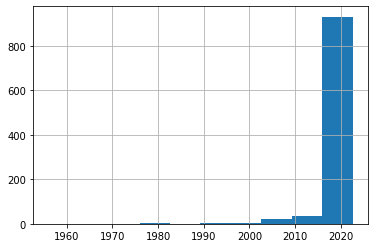

In [5]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

In [6]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


In [7]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)


,Name,Count
3,remdesivir,12
7,dexamethasone,12
0,hydroxychloroquine,7
4,azithromycin,6
1,chloroquine,3
2,tocilizumab,2
5,lopinavir,1
8,heparin,1
9,favipiravir,1
6,ritonavir,0


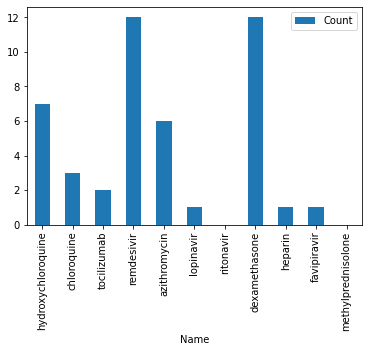

In [8]:
dfm.set_index('Name').plot(kind='bar')
plt.show()


In [9]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                              1            0            0   
             2                              0            0            0   
             3                              0            0            0   
             4                              0            0            0   
             5                              0            0            0   
             6                              0            0            0   
             7                              3            3            0   
             8                              0            0            2   
             9                              0            0            0   
             10                             0            0            0   
             11                             0            0            0   
             12                             0            0            0   
2021         1                              2            0            0   
             2                              0            0            0   
             3                              0            0            0   
             4                              0            0            0   
             5                              0            0            0   
             6                              0            0            0   
             7                              0            0            0   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                      0             0          0          0   
             2                      0             0          0          0   
             3                      0             0          0          0   
             4                      0             0          0          0   
             5                      0             0          0          0   
             6                      9             0          0          0   
             7                      0             5          0          0   
             8                      0             0          0          0   
             9                      0             0          1          0   
             10                     0             0          0          0   
             11                     0             0          0          0   
             12                     0             0          0          0   
2021         1                      3             0          0          0   
             2                      0             0          0          0   
             3                      0             0          0          0   
             4                      0             0          0          0   
             5                      0             0          0          0   
             6                      0             0          0          0   
             7                      0             0          0          0   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                         0        0            0   
             2                         0        0            0   
             3                         0        0            0   
             4                         0        1            0   
             5                         0        0            0   
             6                         0        0            0   
             7                         0        0            0   
             8                         0        0            0   
             9                         0        0            1   
             10                        0        0            0   
             11                        0 

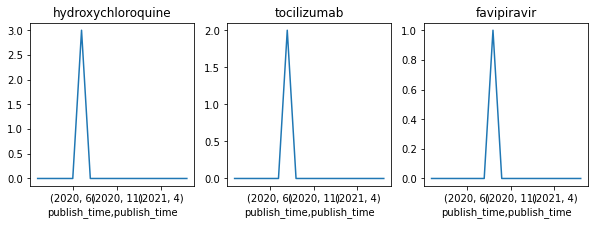

In [10]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

In [11]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [12]:
m

array([[4., 3., 1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [2., 2., 1., 2., 0., 1., 0.],
       [2., 1., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

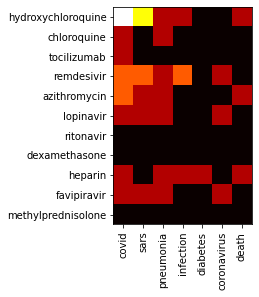

In [13]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

In [16]:
import plotly.graph_objects as go

In [17]:


def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])
